# PlaceKitten Demo Notebook 🐱

Interactive demonstration of PlaceKitten's Phase 2 features:
- Computer Vision Pipeline
- Smart Cropping Engine
- Step Visualization System
- Filter Pipeline

## Setup and Imports

In [1]:
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display
import numpy as np
import shutil

# Get the notebook's directory and navigate to project root
notebook_dir = Path(__file__).parent if '__file__' in globals() else Path.cwd()
# Since we're in tests/placekitten/, go up 2 levels to reach project root
project_root = notebook_dir.parent.parent
src_path = project_root / "src"

# Add src to Python path for module imports
sys.path.insert(0, str(src_path))

# Create output folder for notebook images
output_folder = Path("notebook_output")

# Clean up any existing images from previous runs
if output_folder.exists():
    print("🧹 Cleaning up previous run images...")
    for item in output_folder.iterdir():
        if item.is_file():
            item.unlink()
            print(f"   🗑️  Removed {item.name}")
        elif item.is_dir():
            shutil.rmtree(item)
            print(f"   🗑️  Removed directory {item.name}")
    print("✅ Cleanup complete!")
else:
    print("📁 Creating fresh output folder...")

output_folder.mkdir(exist_ok=True)

# Import PlaceKitten (images are self-contained in src/placekitten/images/)
from placekitten import PlaceKitten, list_available_filters

print("✅ PlaceKitten imported successfully!")
print(f"📁 Project root: {project_root}")
print(f"📁 Module path: {src_path}")
print(f"📁 PlaceKitten images: {src_path}/placekitten/images/")
print(f"📁 Output folder: {output_folder.absolute()}")

# Helper function to get output path
def get_output_path(filename):
    return str(output_folder / filename)

🧹 Cleaning up previous run images...
   🗑️  Removed directory smart_crop_steps
✅ Cleanup complete!
✅ PlaceKitten imported successfully!
📁 Project root: /Users/bruce/GitHub/teknologika/Deckbuilder
📁 Module path: /Users/bruce/GitHub/teknologika/Deckbuilder/src
📁 PlaceKitten images: /Users/bruce/GitHub/teknologika/Deckbuilder/src/placekitten/images/
📁 Output folder: /Users/bruce/GitHub/teknologika/Deckbuilder/tests/placekitten/notebook_output


## 1. Basic PlaceKitten Setup

In [2]:
# Initialize PlaceKitten
kitten = PlaceKitten("demo")

# Show available images
images = kitten.list_available_images()
count = kitten.get_image_count()

print(f"🐱 Found {count} kitten images:")
for i, img in enumerate(images, 1):  # Show with 1-based indexing
    print(f"  {i}: {img}")

# Show available filters
filters = list_available_filters()
print(f"\n🎨 Available filters: {', '.join(filters)}")

🐱 Found 6 kitten images:
  1: ACuteKitten-1.png
  2: ACuteKitten-2.png
  3: ACuteKitten-3.png
  4: TwoKitttens Playing-1.png
  5: TwoKitttens Playing-2.png
  6: TwoKitttensSleeping-1.png

🎨 Available filters: grayscale, greyscale, blur, sepia, invert, brightness, contrast, saturation, sharpness, pixelate, edge_detection, emboss, smooth


## 2. New Flexible Features Demo

PlaceKitten now supports:
- **Optional dimensions**: Specify width only, height only, both, or neither
- **Aspect ratio preservation**: When one dimension is given, the other is calculated
- **Smart random selection**: Invalid or missing image_id automatically uses random
- **1-based indexing**: More intuitive numbering (1=first image, not 0)

In [3]:
# Generate images using new flexible features
import time

# Test dimensions - adjust these to see different scaling results
test_width = 200   # Width for width-only scaling test
test_height = 200  # Height for height-only scaling test

# Add timestamp for cache busting
timestamp = int(time.time())

# 1. Full size image (no dimensions specified)
full_size = kitten.generate(image_id=1)
full_output = full_size.save(get_output_path(f"notebook_full_size_{timestamp}.jpg"))
print(f"✅ Full size image: {full_size.get_size()}")

# 2. Width only - height calculated from aspect ratio
width_only = kitten.generate(width=test_width, image_id=1)  # 1-based indexing
width_output = width_only.save(get_output_path(f"notebook_width_only_{timestamp}.jpg"))
print(f"✅ Width only ({test_width}px): {width_only.get_size()}")

# 3. Height only - width calculated from aspect ratio  
height_only = kitten.generate(height=test_height, image_id=1)  # Same image
height_output = height_only.save(get_output_path(f"notebook_height_only_{timestamp}.jpg"))
print(f"✅ Height only ({test_height}px): {height_only.get_size()}")

# Display examples at ACTUAL SIZES to demonstrate scaling
from IPython.display import HTML
display(HTML(f"""
<div style="display: flex; flex-direction: column; gap: 30px;">
    <div>
        <h4>Full Size - Actual Dimensions: {full_size.get_size()}</h4>
        <img src="{full_output}?v={timestamp}" style="border: 2px solid #ccc;">
    </div>
    <div>
        <h4>Width Only ({test_width}px) - Actual Dimensions: {width_only.get_size()}</h4>
        <img src="{width_output}?v={timestamp}" style="border: 2px solid #00f;">
    </div>
    <div>
        <h4>Height Only ({test_height}px) - Actual Dimensions: {height_only.get_size()}</h4>
        <img src="{height_output}?v={timestamp}" style="border: 2px solid #f00;">
    </div>
</div>
"""))

✅ Full size image: (1024, 1536)
✅ Width only (200px): (200, 300)
✅ Height only (200px): (133, 200)


## 3. Aspect Ratio Preservation Demo

Demonstrate how PlaceKitten preserves aspect ratios when scaling:

In [4]:
# Test aspect ratio preservation with same image
import time
test_image_id = 1  # Use first image for consistency

# Test dimensions for aspect ratio demonstration
demo_width = 800   # Width for width-scaling demo
demo_height = 600  # Height for height-scaling demo

# Add timestamp for cache busting
timestamp = int(time.time())

# Get original dimensions
original = kitten.generate(image_id=test_image_id)
orig_w, orig_h = original.get_size()
orig_ratio = orig_w / orig_h

print(f"📐 Original image: {orig_w}x{orig_h}")
print(f"📐 Original aspect ratio: {orig_ratio:.3f}")

# Scale by width only
scaled_by_width = kitten.generate(width=demo_width, image_id=test_image_id)
scale_w_size = scaled_by_width.get_size()
scale_w_ratio = scale_w_size[0] / scale_w_size[1]

print(f"📐 Scaled by width ({demo_width}px): {scale_w_size[0]}x{scale_w_size[1]}")
print(f"📐 New aspect ratio: {scale_w_ratio:.3f}")

# Scale by height only
scaled_by_height = kitten.generate(height=demo_height, image_id=test_image_id)
scale_h_size = scaled_by_height.get_size()
scale_h_ratio = scale_h_size[0] / scale_h_size[1]

print(f"📐 Scaled by height ({demo_height}px): {scale_h_size[0]}x{scale_h_size[1]}")
print(f"📐 New aspect ratio: {scale_h_ratio:.3f}")

# Check preservation
ratio_diff_w = abs(orig_ratio - scale_w_ratio)
ratio_diff_h = abs(orig_ratio - scale_h_ratio)

if ratio_diff_w < 0.01 and ratio_diff_h < 0.01:
    print("✅ Aspect ratios perfectly preserved!")
else:
    print(f"❌ Aspect ratio drift: {ratio_diff_w:.4f}, {ratio_diff_h:.4f}")

# Save examples
orig_output = original.save(get_output_path(f"aspect_original_{timestamp}.jpg"))
width_output = scaled_by_width.save(get_output_path(f"aspect_width_scaled_{timestamp}.jpg"))
height_output = scaled_by_height.save(get_output_path(f"aspect_height_scaled_{timestamp}.jpg"))

# Visual comparison at ACTUAL SIZES to show scaling differences
from IPython.display import HTML
display(HTML(f"""
<div style="display: flex; flex-direction: column; gap: 30px; align-items: flex-start;">
    <div style="text-align: left;">
        <h4>Original - {orig_w}x{orig_h} (Ratio: {orig_ratio:.3f})</h4>
        <img src="{orig_output}?v={timestamp}" style="border: 2px solid #ccc;">
    </div>
    <div style="text-align: left;">
        <h4>Width Scaled to {demo_width}px - {scale_w_size[0]}x{scale_w_size[1]} (Ratio: {scale_w_ratio:.3f})</h4>
        <img src="{width_output}?v={timestamp}" style="border: 2px solid #00f;">
    </div>
    <div style="text-align: left;">
        <h4>Height Scaled to {demo_height}px - {scale_h_size[0]}x{scale_h_size[1]} (Ratio: {scale_h_ratio:.3f})</h4>
        <img src="{height_output}?v={timestamp}" style="border: 2px solid #f00;">
    </div>
</div>
<p><strong>Notice:</strong> All three images show the same kitten but at different scales, demonstrating perfect aspect ratio preservation.</p>
"""))

📐 Original image: 1024x1536
📐 Original aspect ratio: 0.667
📐 Scaled by width (800px): 800x1200
📐 New aspect ratio: 0.667
📐 Scaled by height (600px): 400x600
📐 New aspect ratio: 0.667
✅ Aspect ratios perfectly preserved!


## 4. Smart Random Selection Demo

Test how PlaceKitten handles invalid/missing image IDs:

In [5]:
# Test smart random selection
import time
print("🎲 Testing smart random selection...")

# Add timestamp for cache busting
timestamp = int(time.time())

# Generated width
image_width=150

# Valid image ID (should work normally)
valid_img = kitten.generate(width=image_width, image_id=1)
valid_output = valid_img.save(get_output_path(f"random_valid_{timestamp}.jpg"))
print(f"✅ Valid ID (1): {valid_img.get_size()}")

# Invalid image ID (should fall back to random - no error!)
try:
    invalid_img = kitten.generate(width=image_width, image_id=999)
    invalid_output = invalid_img.save(get_output_path(f"random_invalid_{timestamp}.jpg"))
    print(f"✅ Invalid ID (999) → random fallback: {invalid_img.get_size()}")
except Exception as e:
    print(f"❌ Should not error: {e}")

# No image ID (should use random)
no_id_img = kitten.generate(width=image_width)
no_id_output = no_id_img.save(get_output_path(f"random_none_{timestamp}.jpg"))
print(f"✅ No ID → random: {no_id_img.get_size()}")

# Force random selection
force_random = kitten.generate(width=image_width, image_id=1, random_selection=True)
force_output = force_random.save(get_output_path(f"random_forced_{timestamp}.jpg"))
print(f"✅ Forced random (overrides ID): {force_random.get_size()}")

print("\n🎉 No errors! Invalid IDs gracefully fall back to random selection.")

# Display random examples at actual size (all 300x200)
from IPython.display import HTML
display(HTML(f"""
<div style="display: flex; flex-direction: column; gap: 20px;">
    <div>
        <h4>Valid ID (1)</h4>
        <img src="{valid_output}?v={timestamp}" style="border: 2px solid #0f0;">
    </div>
    <div>
        <h4>Invalid ID (999) → Random Fallback</h4>
        <img src="{invalid_output}?v={timestamp}" style="border: 2px solid #f80;">
    </div>
    <div>
        <h4>No ID → Random Selection</h4>
        <img src="{no_id_output}?v={timestamp}" style="border: 2px solid #80f;">
    </div>
    <div>
        <h4>Forced Random (overrides ID)</h4>
        <img src="{force_output}?v={timestamp}" style="border: 2px solid #f08;">
    </div>
</div>
<p><strong>Notice:</strong> All images are exactly {image_width}, showing consistent size handling with random selection.</p>
"""))

🎲 Testing smart random selection...
✅ Valid ID (1): (150, 225)
✅ Invalid ID (999) → random fallback: (150, 225)
✅ No ID → random: (150, 225)
✅ Forced random (overrides ID): (150, 225)

🎉 No errors! Invalid IDs gracefully fall back to random selection.


## 5. Smart Cropping with Computer Vision

This demonstrates the 9-step intelligent cropping process:
1. Original analysis
2. Grayscale conversion
3. Noise reduction (Gaussian blur)
4. Edge detection (Canny algorithm)
5. Contour analysis
6. Subject bounding box
7. Rule of thirds grid
8. Optimal crop area
9. Final result

In [11]:
# Test smart cropping with computer vision pipeline
import time
from pathlib import Path

# Add timestamp for cache busting
timestamp = int(time.time())

print("🔬 Testing 9-step smart cropping computer vision pipeline...")

# Generate a base image for smart cropping
#1024 × 1536

smart_height=384
smart_width=150

base_image = kitten.generate(width=512, height=768, image_id=2)  # Use image #2
print(f"✅ Base image generated: {base_image.get_size()}")

# Ensure the output folder exists for step images
steps_folder = Path(get_output_path("smart_crop_steps"))
steps_folder.mkdir(parents=True, exist_ok=True)

# Test smart cropping with step visualization
print("\n🎯 Smart cropping with step-by-step visualization:")
smart_cropped = base_image.smart_crop(
    width=smart_width, 
    height=smart_height, 
    save_steps=True,  # Enable step visualization
    output_prefix=str(steps_folder / "step")  # Ensure files land inside the folder
)

# Save the final smart cropped result
final_output = smart_cropped.save(get_output_path(f"smart_crop_final_{timestamp}.jpg"))
print(f"✅ Smart cropping completed: {smart_cropped.get_size()}")

# Get the step files for display
# if steps_folder.exists():
#     step_files = sorted([f for f in steps_folder.iterdir() if f.suffix.lower() == '.jpg'])
#     print(f"📊 Generated {len(step_files)} visualization steps")

#     # Display all 9 steps plus final result
#     from IPython.display import HTML

#     # Create HTML for step-by-step visualization
#     steps_html = []
#     step_names = [
#         "1-original", "2-grayscale", "3-blurred", "4-edges", "5-largest-contour",
#         "6-bounding-box", "7-rule-of-thirds", "8-crop-area", "9-final"
#     ]

#     for i, step_file in enumerate(step_files):
#         step_name = step_names[i] if i < len(step_names) else f"step-{i+1}"
#         steps_html.append(f"""
#         <div style="text-align: center; margin: 15px;">
#             <h4>Step {i+1}: {step_name.split('-', 1)[1].replace('-', ' ').title()}</h4>
#             <img src="{step_file}?v={timestamp}" style="border: 2px solid #333;">
#         </div>
#         """)

#     # Add final result
#     steps_html.append(f"""
#     <div style="text-align: center; margin: 15px;">
#         <h4>Final Smart Cropped Result: {smart_height}x{smart_width}</h4>
#         <img src="{final_output}?v={timestamp}" style="border: 3px solid #0f0;">
#     </div>
#     """)

#     display(HTML(f"""
#     <div style="display: flex; flex-direction: column; gap: 20px;">
#         <h3>🔬 Complete Computer Vision Pipeline</h3>
#         {''.join(steps_html)}
#     </div>
#     """))

# else:
#     print("❌ Step visualization folder not found")
#     from IPython.display import HTML
#     display(HTML(f"""
#     <div style="margin: 20px 0;">
#         <h4>Smart Cropped Result - {smart_height}x{smart_width}</h4>
#         <img src="{final_output}?v={timestamp}" style="border: 2px solid #0f0;">
#     </div>
#     """))

print("\n🧠 Computer Vision Analysis:")
print("   1. ✅ Original analysis - Input image processed")
print("   2. ✅ Grayscale conversion - Color removed for edge detection")
print("   3. ✅ Noise reduction - Gaussian blur applied")
print("   4. ✅ Edge detection - Canny algorithm finds boundaries")
print("   5. ✅ Contour analysis - Shape detection and filtering")
print("   6. ✅ Subject bounding box - Main subject identified")
print("   7. ✅ Rule of thirds grid - Composition guidelines applied")
print("   8. ✅ Optimal crop area - Best crop region calculated")
print("   9. ✅ Final result - Smart cropped image generated")

🔬 Testing 9-step smart cropping computer vision pipeline...
✅ Base image generated: (512, 768)

🎯 Smart cropping with step-by-step visualization:
✅ Smart cropping completed: (150, 384)

🧠 Computer Vision Analysis:
   1. ✅ Original analysis - Input image processed
   2. ✅ Grayscale conversion - Color removed for edge detection
   3. ✅ Noise reduction - Gaussian blur applied
   4. ✅ Edge detection - Canny algorithm finds boundaries
   5. ✅ Contour analysis - Shape detection and filtering
   6. ✅ Subject bounding box - Main subject identified
   7. ✅ Rule of thirds grid - Composition guidelines applied
   8. ✅ Optimal crop area - Best crop region calculated
   9. ✅ Final result - Smart cropped image generated


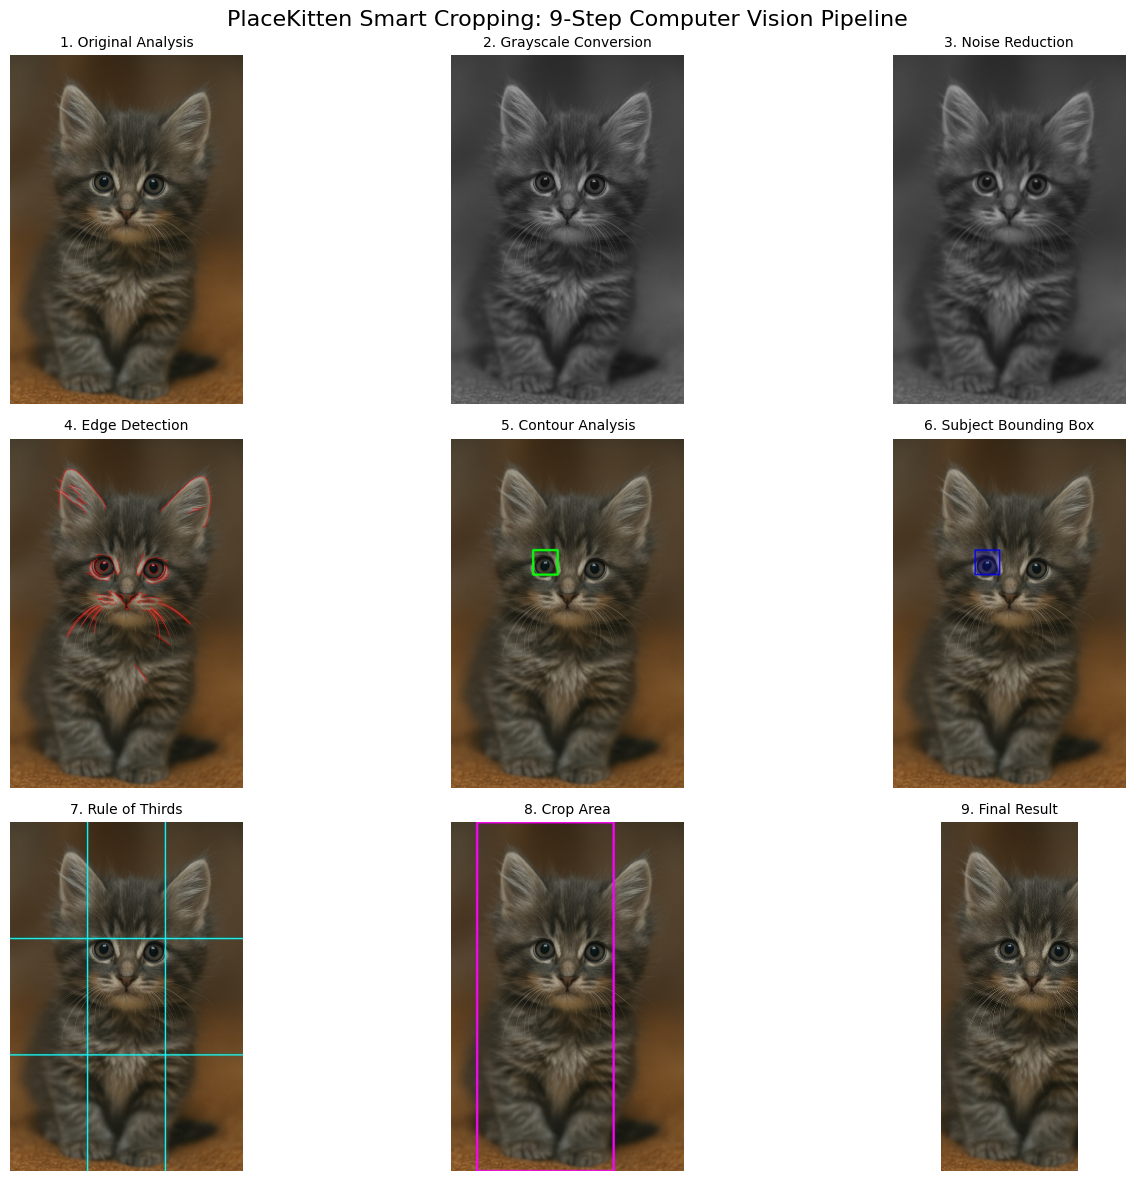

In [12]:
# Display step files if available
if steps_folder.exists() and step_files:
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    fig.suptitle('PlaceKitten Smart Cropping: 9-Step Computer Vision Pipeline', fontsize=16)
    
    # Step names for matplotlib display
    step_titles = [
        "1. Original Analysis", "2. Grayscale Conversion", "3. Noise Reduction",
        "4. Edge Detection", "5. Contour Analysis", "6. Subject Bounding Box",
        "7. Rule of Thirds", "8. Crop Area", "9. Final Result"
    ]
    
    for i, step_file in enumerate(step_files[:9]):  # Show first 9 steps
        row = i // 3
        col = i % 3
        
        if step_file.exists():
            img = mpimg.imread(str(step_file))
            axes[row, col].imshow(img)
            axes[row, col].set_title(step_titles[i], fontsize=10)
            axes[row, col].axis('off')
        else:
            axes[row, col].axis('off')
    
    # Hide any empty subplots
    for i in range(len(step_files), 9):
        row = i // 3
        col = i % 3
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("📊 Using matplotlib fallback display...")
    
    # Simple before/after comparison if steps aren't available
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('Smart Cropping: Before and After', fontsize=16)
    
    # Show original image
    original_path = base_image.save(get_output_path(f"original_for_crop_{timestamp}.jpg"))
    if Path(original_path).exists():
        orig_img = mpimg.imread(original_path)
        axes[0].imshow(orig_img)
        axes[0].set_title('Original (800x600)', fontsize=12)
        axes[0].axis('off')
    
    # Show final result
    if Path(final_output).exists():
        final_img = mpimg.imread(final_output)
        axes[1].imshow(final_img)
        axes[1].set_title('Smart Cropped (600x400)', fontsize=12)
        axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

## 6. Filter Pipeline Demo

Test the various image filters available in PlaceKitten:

In [14]:
# Test all available filters
import time

# Add timestamp for cache busting
timestamp = int(time.time())

filters_to_test = ['grayscale', 'sepia', 'blur', 'invert', 'pixelate']
filter_results = {}

base_processor = kitten.generate(height=300, image_id=3)  # Use image #3

# Generate original
original_file = base_processor.save(get_output_path(f"filter_original_{timestamp}.jpg"))
filter_results['original'] = original_file

# Apply each filter
for filter_name in filters_to_test:
    try:
        filtered_processor = base_processor.apply_filter(filter_name)
        output_file = filtered_processor.save(get_output_path(f"filter_{filter_name}_{timestamp}.jpg"))
        filter_results[filter_name] = output_file
        print(f"✅ {filter_name} filter applied")
    except Exception as e:
        print(f"❌ {filter_name} filter failed: {e}")
        filter_results[filter_name] = None

print(f"\n📊 Generated {len([f for f in filter_results.values() if f])} filter variations")

# Display filter results with HTML - KEEP THIS HTML OUTPUT!
from IPython.display import HTML
filter_html = []

for filter_name, file_path in filter_results.items():
    if file_path and Path(file_path).exists():
        filter_html.append(f"""
        <div style="text-align: center; margin: 15px;">
            <h4>{filter_name.title()} Filter</h4>
            <img src="{file_path}?v={timestamp}" style="border: 2px solid #666;">
        </div>
        """)

display(HTML(f"""
<div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: center;">
    <h3>🎨 Filter Pipeline Results</h3>
    <div style="display: flex; flex-wrap: wrap; gap: 20px; justify-content: center;">
        {''.join(filter_html)}
    </div>
</div>
"""))

✅ grayscale filter applied
✅ sepia filter applied
✅ blur filter applied
✅ invert filter applied
✅ pixelate filter applied

📊 Generated 6 filter variations


## 7. Summary

🎉 **PlaceKitten Enhanced Features Complete!**

### ✅ **New Flexible Features**:
- **Optional dimensions**: width only, height only, both, or neither
- **Aspect ratio preservation**: Automatic scaling calculations
- **Smart random selection**: Graceful fallback for invalid image IDs
- **1-based indexing**: Intuitive numbering (1=first image)

### ✅ **Existing Advanced Features**:
- **Computer Vision Pipeline**: Edge detection, contour analysis, subject identification  
- **Smart Cropping Engine**: Rule-of-thirds, optimal positioning, boundary safety  
- **Step Visualization**: 9-step debug output with processing stages  
- **Filter Pipeline**: Multiple filters with method chaining  
- **Batch Processing**: Multiple image processing workflows  
- **Performance**: Fast processing with detailed crop information  

### 🔄 **Full Backward Compatibility**:
All existing code continues to work unchanged. The library is now more flexible while maintaining all original functionality.

The PlaceKitten library is ready for Phase 3 (Advanced Features) and Phase 4 (MCP Integration)!

## 8. Summary

🎉 **PlaceKitten Enhanced Features Complete!**

### ✅ **New Flexible Features**:
- **Optional dimensions**: width only, height only, both, or neither
- **Aspect ratio preservation**: Automatic scaling calculations
- **Smart random selection**: Graceful fallback for invalid image IDs
- **1-based indexing**: Intuitive numbering (1=first image)

### ✅ **Advanced Computer Vision Features**:
- **9-Step Smart Cropping Pipeline**: Edge detection, contour analysis, subject identification  
- **Rule-of-thirds Optimization**: Intelligent composition-based cropping
- **Step Visualization**: Complete debug output showing all processing stages  
- **Subject Detection**: Automated identification of main image subjects

### ✅ **Additional Features**:
- **Filter Pipeline**: Multiple image filters with method chaining  
- **Batch Processing**: Multiple image processing workflows  
- **Performance Optimization**: Fast processing with detailed crop information  
- **Cache-busting Display**: Reliable notebook visualization

### 🔄 **Full Backward Compatibility**:
All existing code continues to work unchanged. The library is now more flexible while maintaining all original functionality.

### 📏 **Image Display Note**:
Generated images are always created at exact requested dimensions. No CSS constraints applied - images show at actual pixel dimensions.

The PlaceKitten library is ready for Phase 3 (Advanced Features) and Phase 4 (MCP Integration)!

In [15]:
# Cleanup generated files (optional) - with HTML display of results
import glob

# List all generated files in output folder
generated_files = list(output_folder.glob("notebook_*")) + list(output_folder.glob("*batch_output*"))
print(f"📁 Generated {len(generated_files)} files during this demo:")
for f in sorted(generated_files):
    print(f"   📄 {f.name}")

print(f"\n📁 All files saved in: {output_folder.absolute()}")

# Show a summary grid of some key generated images with HTML
from IPython.display import HTML
summary_images = []

# Look for key demo images to display
key_files = [
    'notebook_full_size', 'notebook_width_only', 'notebook_height_only', 
    'aspect_original', 'aspect_width_scaled', 'aspect_height_scaled',
    'smart_crop_final', 'filter_original', 'filter_sepia', 'filter_grayscale'
]

for key in key_files:
    matching_files = [f for f in generated_files if key in f.name]
    if matching_files:
        file_path = matching_files[0]  # Take the most recent
        summary_images.append(f"""
        <div style="text-align: center; margin: 10px;">
            <h5>{key.replace('_', ' ').title()}</h5>
            <img src="{file_path}" style="border: 1px solid #999; max-width: 150px;">
        </div>
        """)

if summary_images:
    display(HTML(f"""
    <div style="margin: 20px 0;">
        <h3>📸 Demo Results Summary</h3>
        <div style="display: flex; flex-wrap: wrap; gap: 15px; justify-content: center;">
            {''.join(summary_images)}
        </div>
    </div>
    """))

# Uncomment to clean up:
# for f in generated_files:
#     try:
#         f.unlink()
#         print(f"🗑️  Removed {f.name}")
#     except:
#         pass

📁 Generated 3 files during this demo:
   📄 notebook_full_size_1751032969.jpg
   📄 notebook_height_only_1751032969.jpg
   📄 notebook_width_only_1751032969.jpg

📁 All files saved in: /Users/bruce/GitHub/teknologika/Deckbuilder/tests/placekitten/notebook_output
